## Behaviour-Informed Investment Adoption Predictor Using Demographic and Campaign Data
**Problem statement**: Banks face challenges in predicting which users are likely to adopt investment products despite assessed user data. Traditional demographic targeting may misunderline psychological factors that influence behavior.

**Objective:** This project aims to predict customer adoption of investment products (term deposits) using demographic and interaction data, guided by the Theory of Planned Behavior. The outcome will support targeted marketing strategies, increase adoption rates, and personalize user engagement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [2]:
bank_data = pd.read_csv("bank-full.csv")
bank_data.head(3)

,age,Gender,job,marital,education,Location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,Female,management,married,tertiary,Suburban,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,Male,technician,single,secondary,Urban,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,Female,entrepreneur,married,secondary,Suburban,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [3]:
print("Number of Row :", bank_data.shape[0])
print("Number of Column :", bank_data.shape[1])
print("="*100, "\nFeatures : \n ", bank_data.columns.tolist())
print("="*100, "\nMissing Values : \n ", bank_data.isnull().sum().values.sum())
print("="*100, "\nUnique Values : \n " , bank_data.nunique())
print ("="*100,"\nduplicate values :  \n",bank_data.duplicated().sum())

Number of Row : 45211
Number of Column : 19
Features : 
  ['age', 'Gender', 'job', 'marital', 'education', 'Location', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
Missing Values : 
  0
Unique Values : 
  age            77
Gender          2
job            12
marital         3
education       4
Location        3
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64
duplicate values :  
 0


## Data Handling

In [4]:
bank_data[['education', 'job']] = bank_data[['education', 'job']].replace('unknown', np.nan)
percentage_missing = np.round(bank_data.isnull().sum().sort_values(ascending=False)/len(bank_data)*100, 2)
percentage_missing

education    4.11
job          0.64
age          0.00
day          0.00
poutcome     0.00
previous     0.00
pdays        0.00
campaign     0.00
duration     0.00
month        0.00
loan         0.00
contact      0.00
Gender       0.00
housing      0.00
balance      0.00
default      0.00
Location     0.00
marital      0.00
y            0.00
dtype: float64

## Remarks.
**PoutCome and Contact** : The missing data will be kept as Unknown, it could mean that they were not contacted.
**Education and job** : will be filled with the mode

In [5]:
bank_data['education'] = bank_data['education'].fillna(bank_data['education'].mode()[0])
bank_data['job'] = bank_data['job'].fillna(bank_data['job'].mode()[0])


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   Gender     45211 non-null  object
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   Location   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  y          45211 non-null  object
dtypes: int64(7), object(12)
memory usage: 6.6+ MB


# EDA

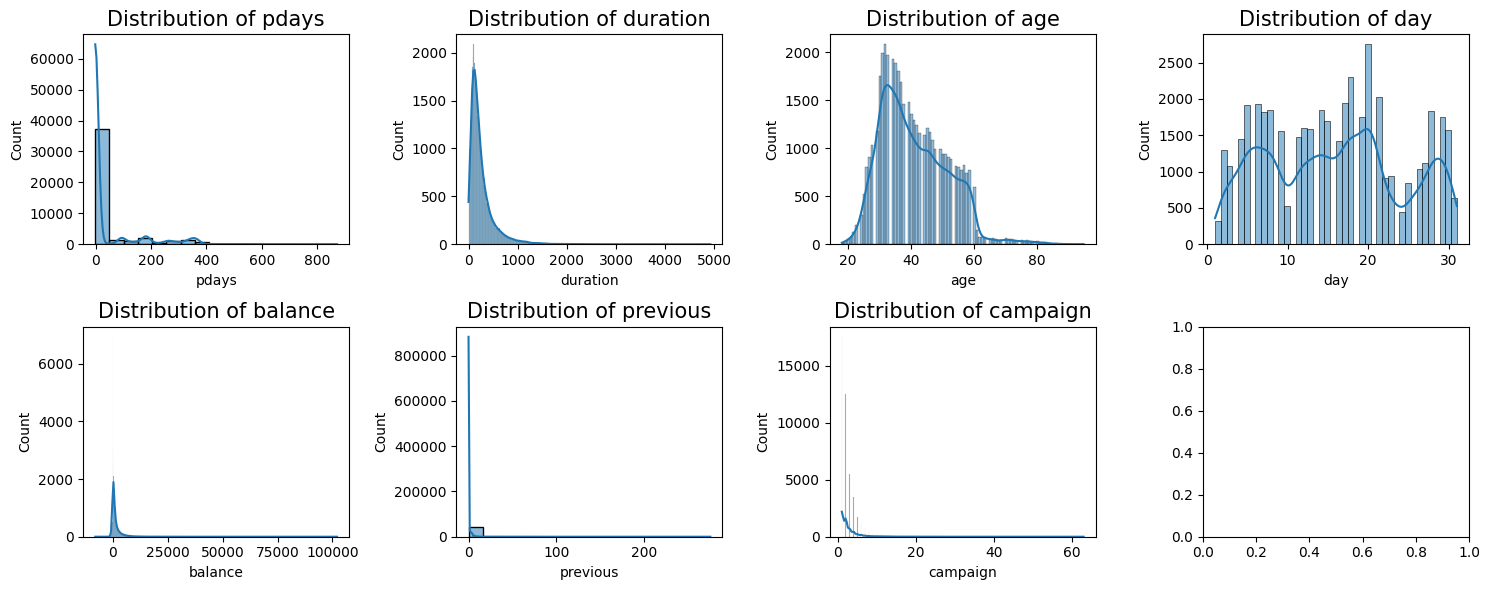

In [7]:
def numeric_distribution(feature, data, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    sns.histplot(data=data, x=feature,kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}', size=15)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

features = ['pdays', 'duration', 'age', 'day', 'balance', 'previous', 'campaign']

fig, axes = plt.subplots(2, 4, figsize=(15,6))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    numeric_distribution(feature, bank_data, ax=ax)



plt.tight_layout()
plt.show()


# Distribution of Numeric Features
This section visualizes the distribution of key numeric features in the dataset using histograms and KDE plots. It helps to understand the spread, skewness, and potential outliers in features like age, balance, duration, etc.

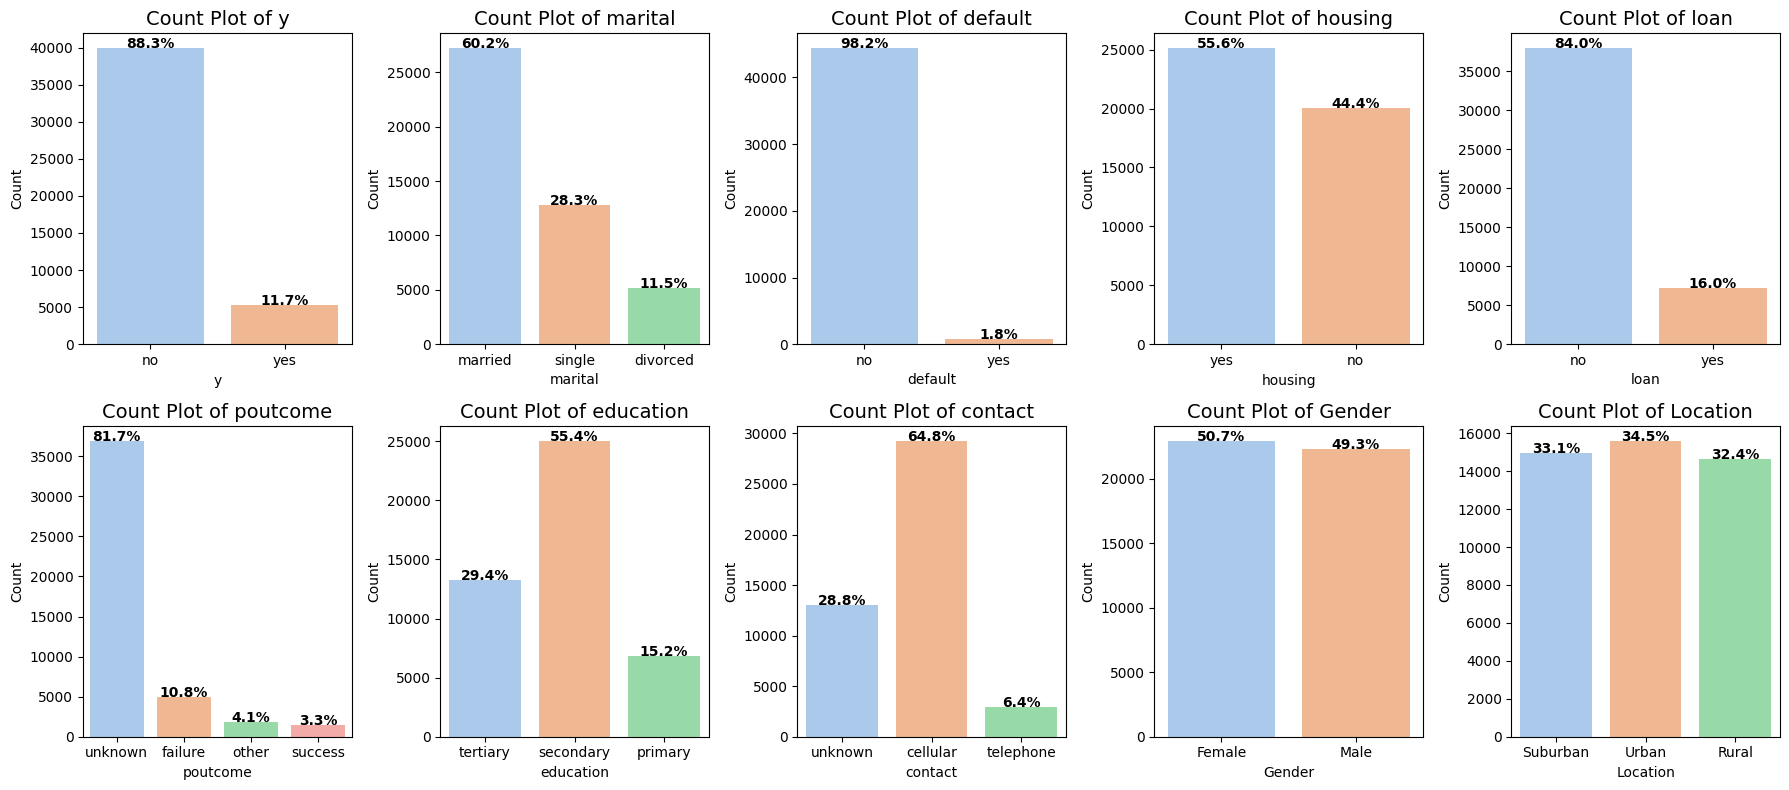

In [8]:
def cat_distribution(feature, data, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,5))

    sns.countplot(x=feature, data=data,palette="pastel", ax=ax)
    total = len(data[feature])
    for p in ax.patches:
        percentage_cat = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 2
        ax.annotate(percentage_cat, (x, y), ha='center', fontsize=10, fontweight='bold')

    ax.set_title(f'Count Plot of {feature}', fontsize=14)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    
feature_cat = ['y', 'marital', 'default', 'housing', 'loan', 'poutcome', 'education', 'contact', 'Gender', 'Location' ]
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for ax, feature in zip(axes, feature_cat):
    cat_distribution(feature, bank_data, ax=ax)

plt.tight_layout()
plt.show()

# Distribution of Categorical Features
Here, count plots are used to show the frequency of each category for categorical variables. Percentages are annotated to provide a clearer understanding of the data composition for features like marital status, education, job, etc.

In [9]:
def age_dist(x):
    if x <= 25:
        return 'Young Adult'
    elif x <= 60:
        return 'Adult'
    else:
        return 'Elderly'

bank_data['age_group'] = bank_data['age'].apply(age_dist)


def balance_dist(x):
    if x < 0:
        return 'Negative'
    elif 0 <= x <= 3000:
        return 'Low'
    elif 3000 < x <= 4000:
        return 'Middle'
    else:
        return 'High'
    
bank_data['balance_status'] = bank_data['balance'].apply(balance_dist)


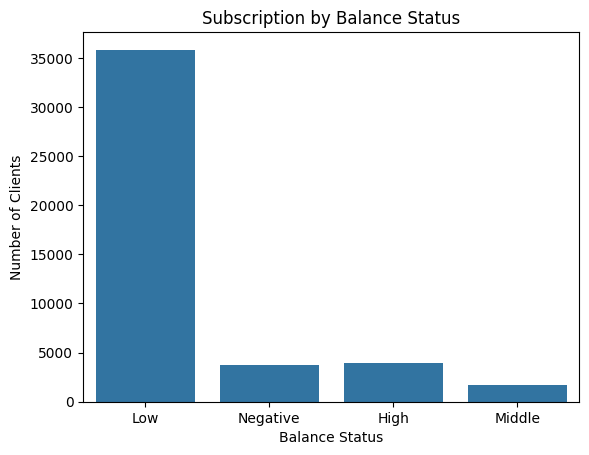

In [10]:
sns.countplot(x='balance_status', data=bank_data)
plt.title('Subscription by Balance Status')
plt.ylabel('Number of Clients')
plt.xlabel('Balance Status')
plt.show()

# Subscription by Balance Status
This plot shows how the balance status (Negative, Low, Middle, High) relates to the number of clients subscribing to the term deposit. It helps identify if balance influences subscription rates.

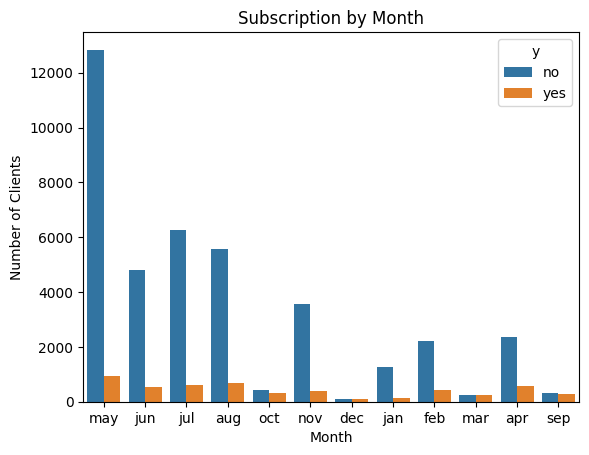

In [11]:
sns.countplot(x='month', data=bank_data, hue='y')
plt.title('Subscription by Month')
plt.ylabel('Number of Clients')
plt.xlabel('Month')
plt.show()

# Subscription by Month
This count plot visualizes the number of subscriptions per month, split by the target variable. It helps to identify any seasonality or monthly trends in client subscriptions.

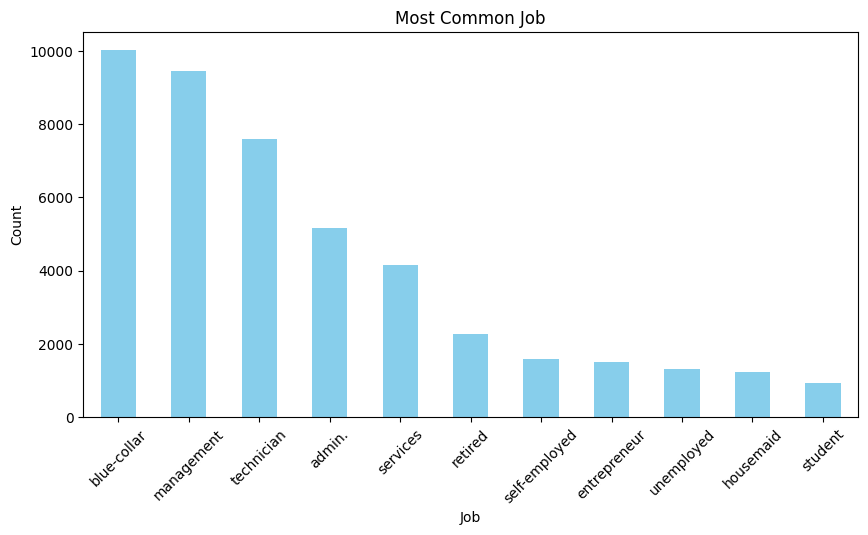

In [12]:
most_common_job = bank_data['job'].value_counts().sort_values(ascending=False)\
    .plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Most Common Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



# Most Common Job
This bar plot displays the frequency of each job type in the dataset, helping to identify which professions are most represented among the clients.

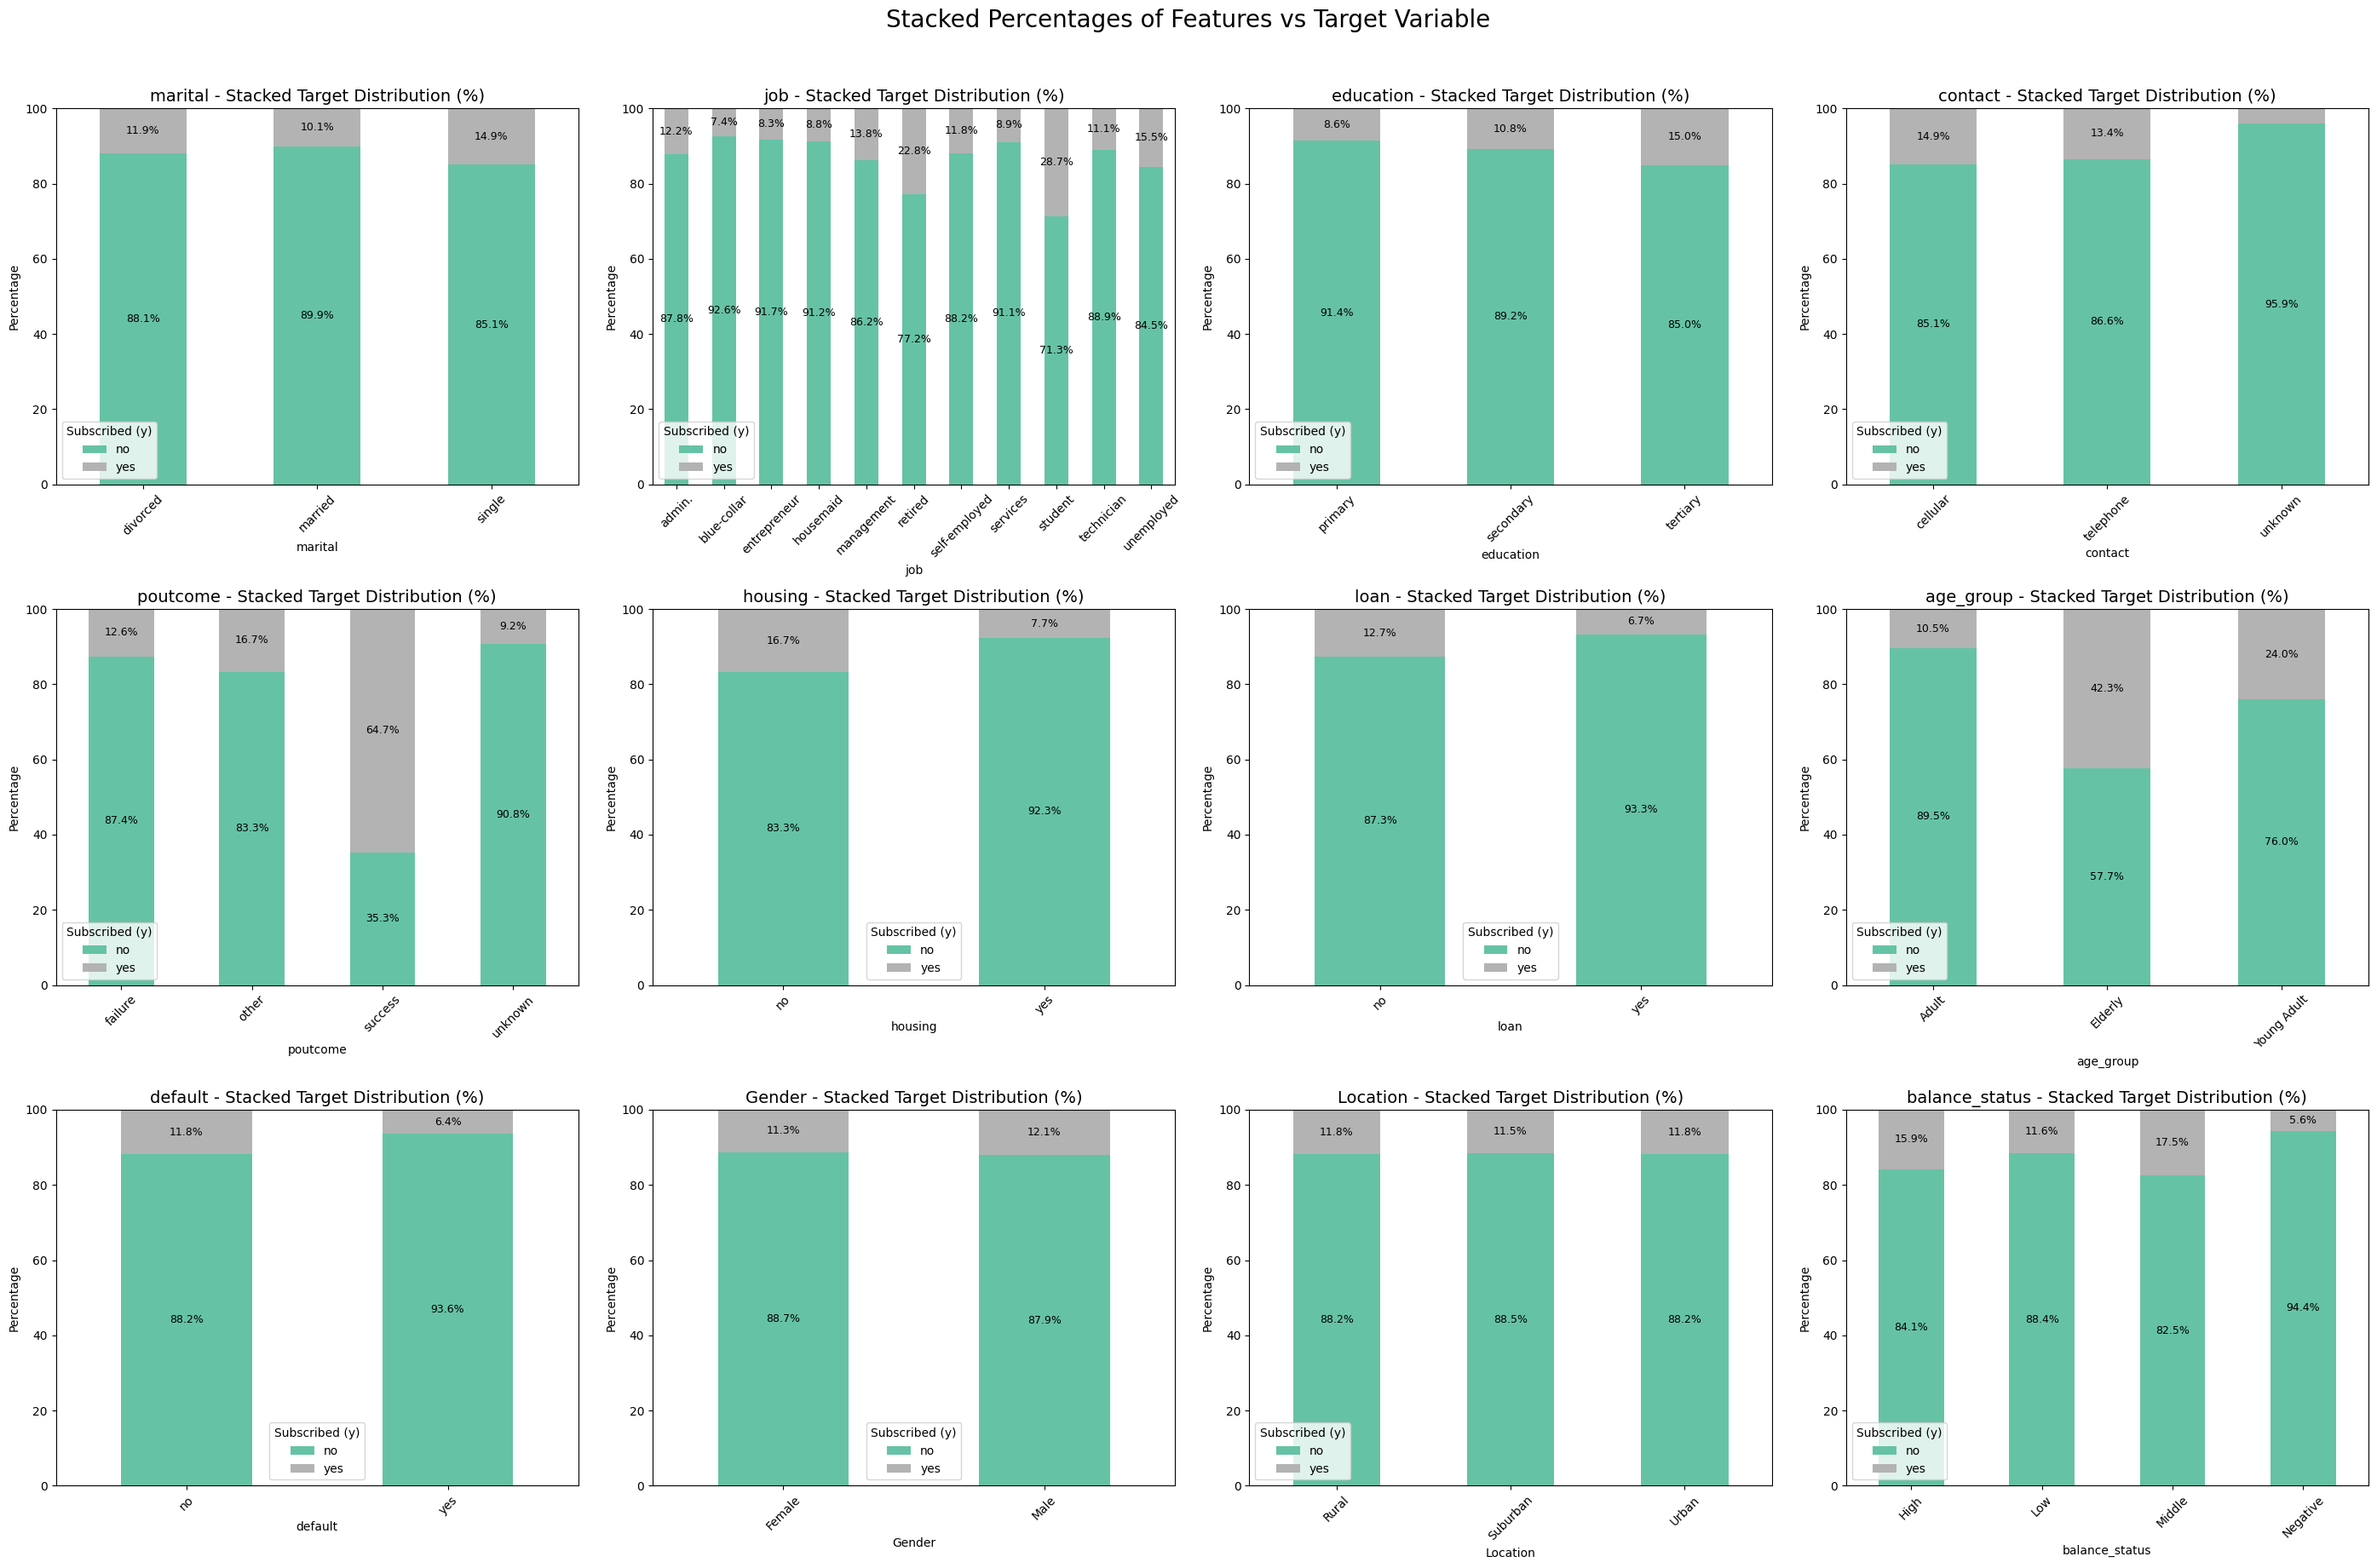

In [13]:
def plot_stacked_percentages(data, feature, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    percentage_df = (
        data.groupby([feature, 'y']).size()
        .unstack(fill_value=0)
        .apply(lambda x: 100 * x / x.sum(), axis=1)
    )

    percentage_df[['no', 'yes']].plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

    ax.set_title(f'{feature} - Stacked Target Distribution (%)', fontsize=14)
    ax.set_ylabel('Percentage')
    ax.set_xlabel(feature)
    ax.legend(title='Subscribed (y)')
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)

    for container in ax.containers:
        labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='black')

features = ['marital', 'job', 'education', 'contact', 'poutcome', 'housing', 'loan',
             'age_group', 'default', 'Gender', 'Location', 'balance_status']

fig, axes = plt.subplots(3, 4, figsize=(28, 18))     
axes = axes.flatten()

for ax, feature in zip(axes, features):
    plot_stacked_percentages(bank_data, feature, ax=ax)
    
plt.suptitle('Stacked Percentages of Features vs Target Variable', fontsize=20, y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

# Stacked Percentages of Features vs Target Variable
Stacked bar charts show the percentage distribution of the target variable ('y') across various categorical features. This helps to compare how different groups within each feature respond to the marketing campaign.

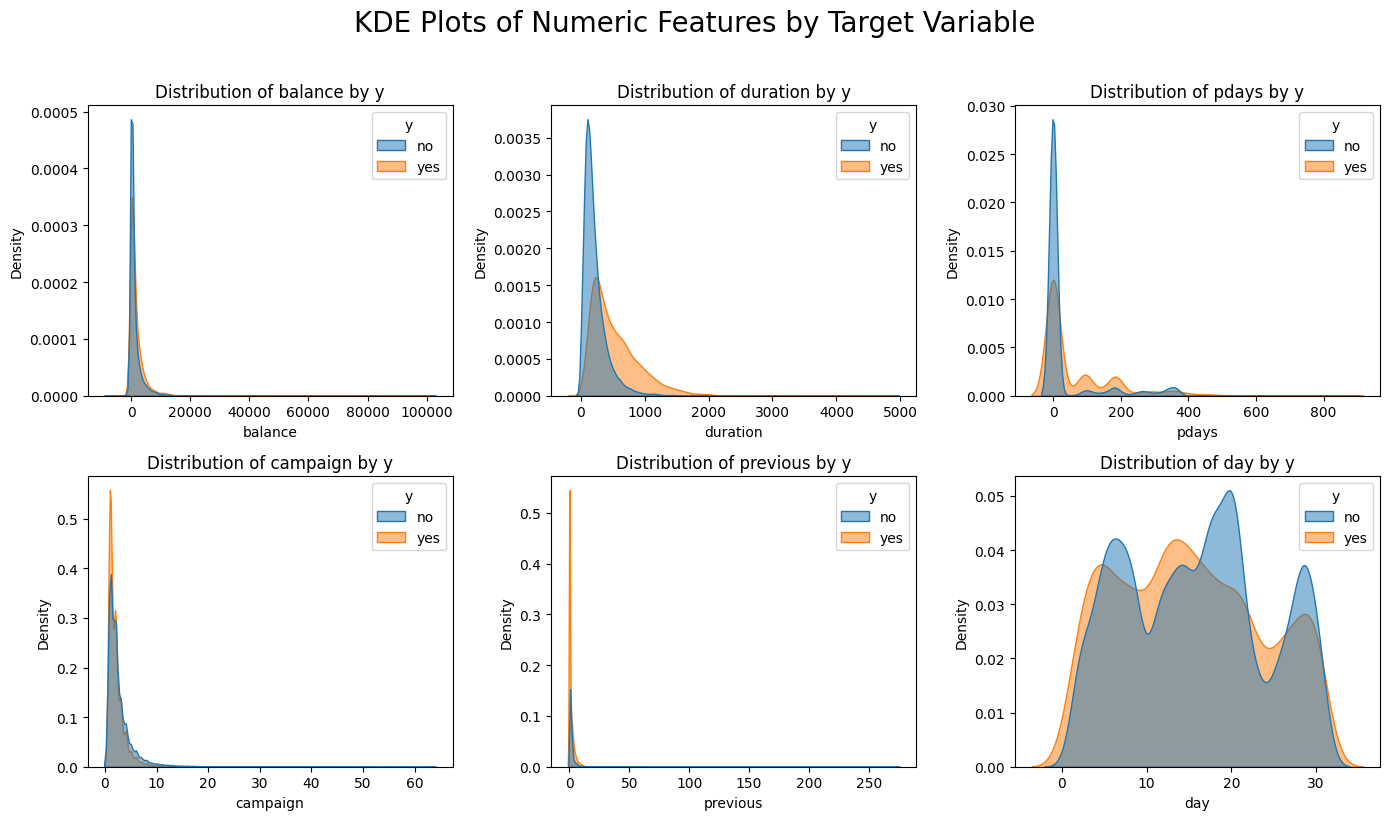

In [14]:
def kde_plot_by_target(data, feature, target, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
    sns.kdeplot(data=data, x=feature, hue=target, fill=True, common_norm=False, alpha=0.5, ax=ax)
    ax.set_title(f'Distribution of {feature} by {target}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')


numeric_features = ['balance', 'duration', 'pdays', 'campaign', 'previous','day']
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
        kde_plot_by_target(bank_data, feature, target='y', ax=axes[i])

for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  

plt.suptitle('KDE Plots of Numeric Features by Target Variable', fontsize=20, y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

# KDE Plots of Numeric Features by Target Variable
Kernel Density Estimate (KDE) plots compare the distribution of numeric features for clients who subscribed vs. those who did not. This helps to see if certain values are associated with higher subscription rates.

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


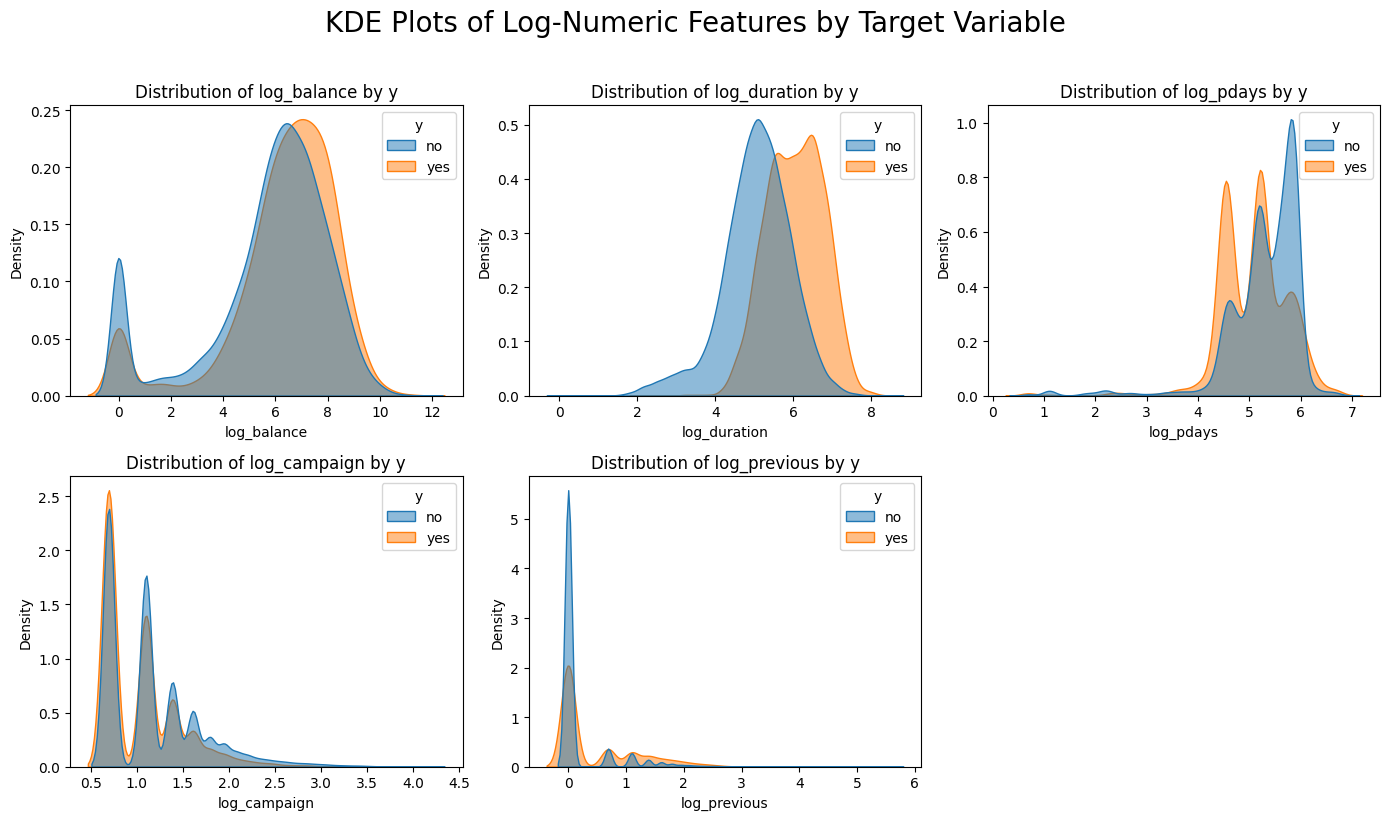

In [15]:
numeric_feature_wot_day = ['balance', 'duration', 'pdays', 'campaign', 'previous']
for feature in numeric_feature_wot_day:
    bank_data[f'log_{feature}'] = np.round(np.log1p(bank_data[feature]), 5)

log_features = [f'log_{feature}' for feature in numeric_feature_wot_day]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, feature in enumerate(log_features):
        kde_plot_by_target(bank_data, feature, target='y', ax=axes[i])

for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  

plt.suptitle('KDE Plots of Log-Numeric Features by Target Variable', fontsize=20, y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

# KDE Plots of Log-Transformed Numeric Features by Target Variable
These KDE plots show the distributions of log-transformed numeric features, which can reveal patterns that are not visible in the original scale due to skewness or outliers.

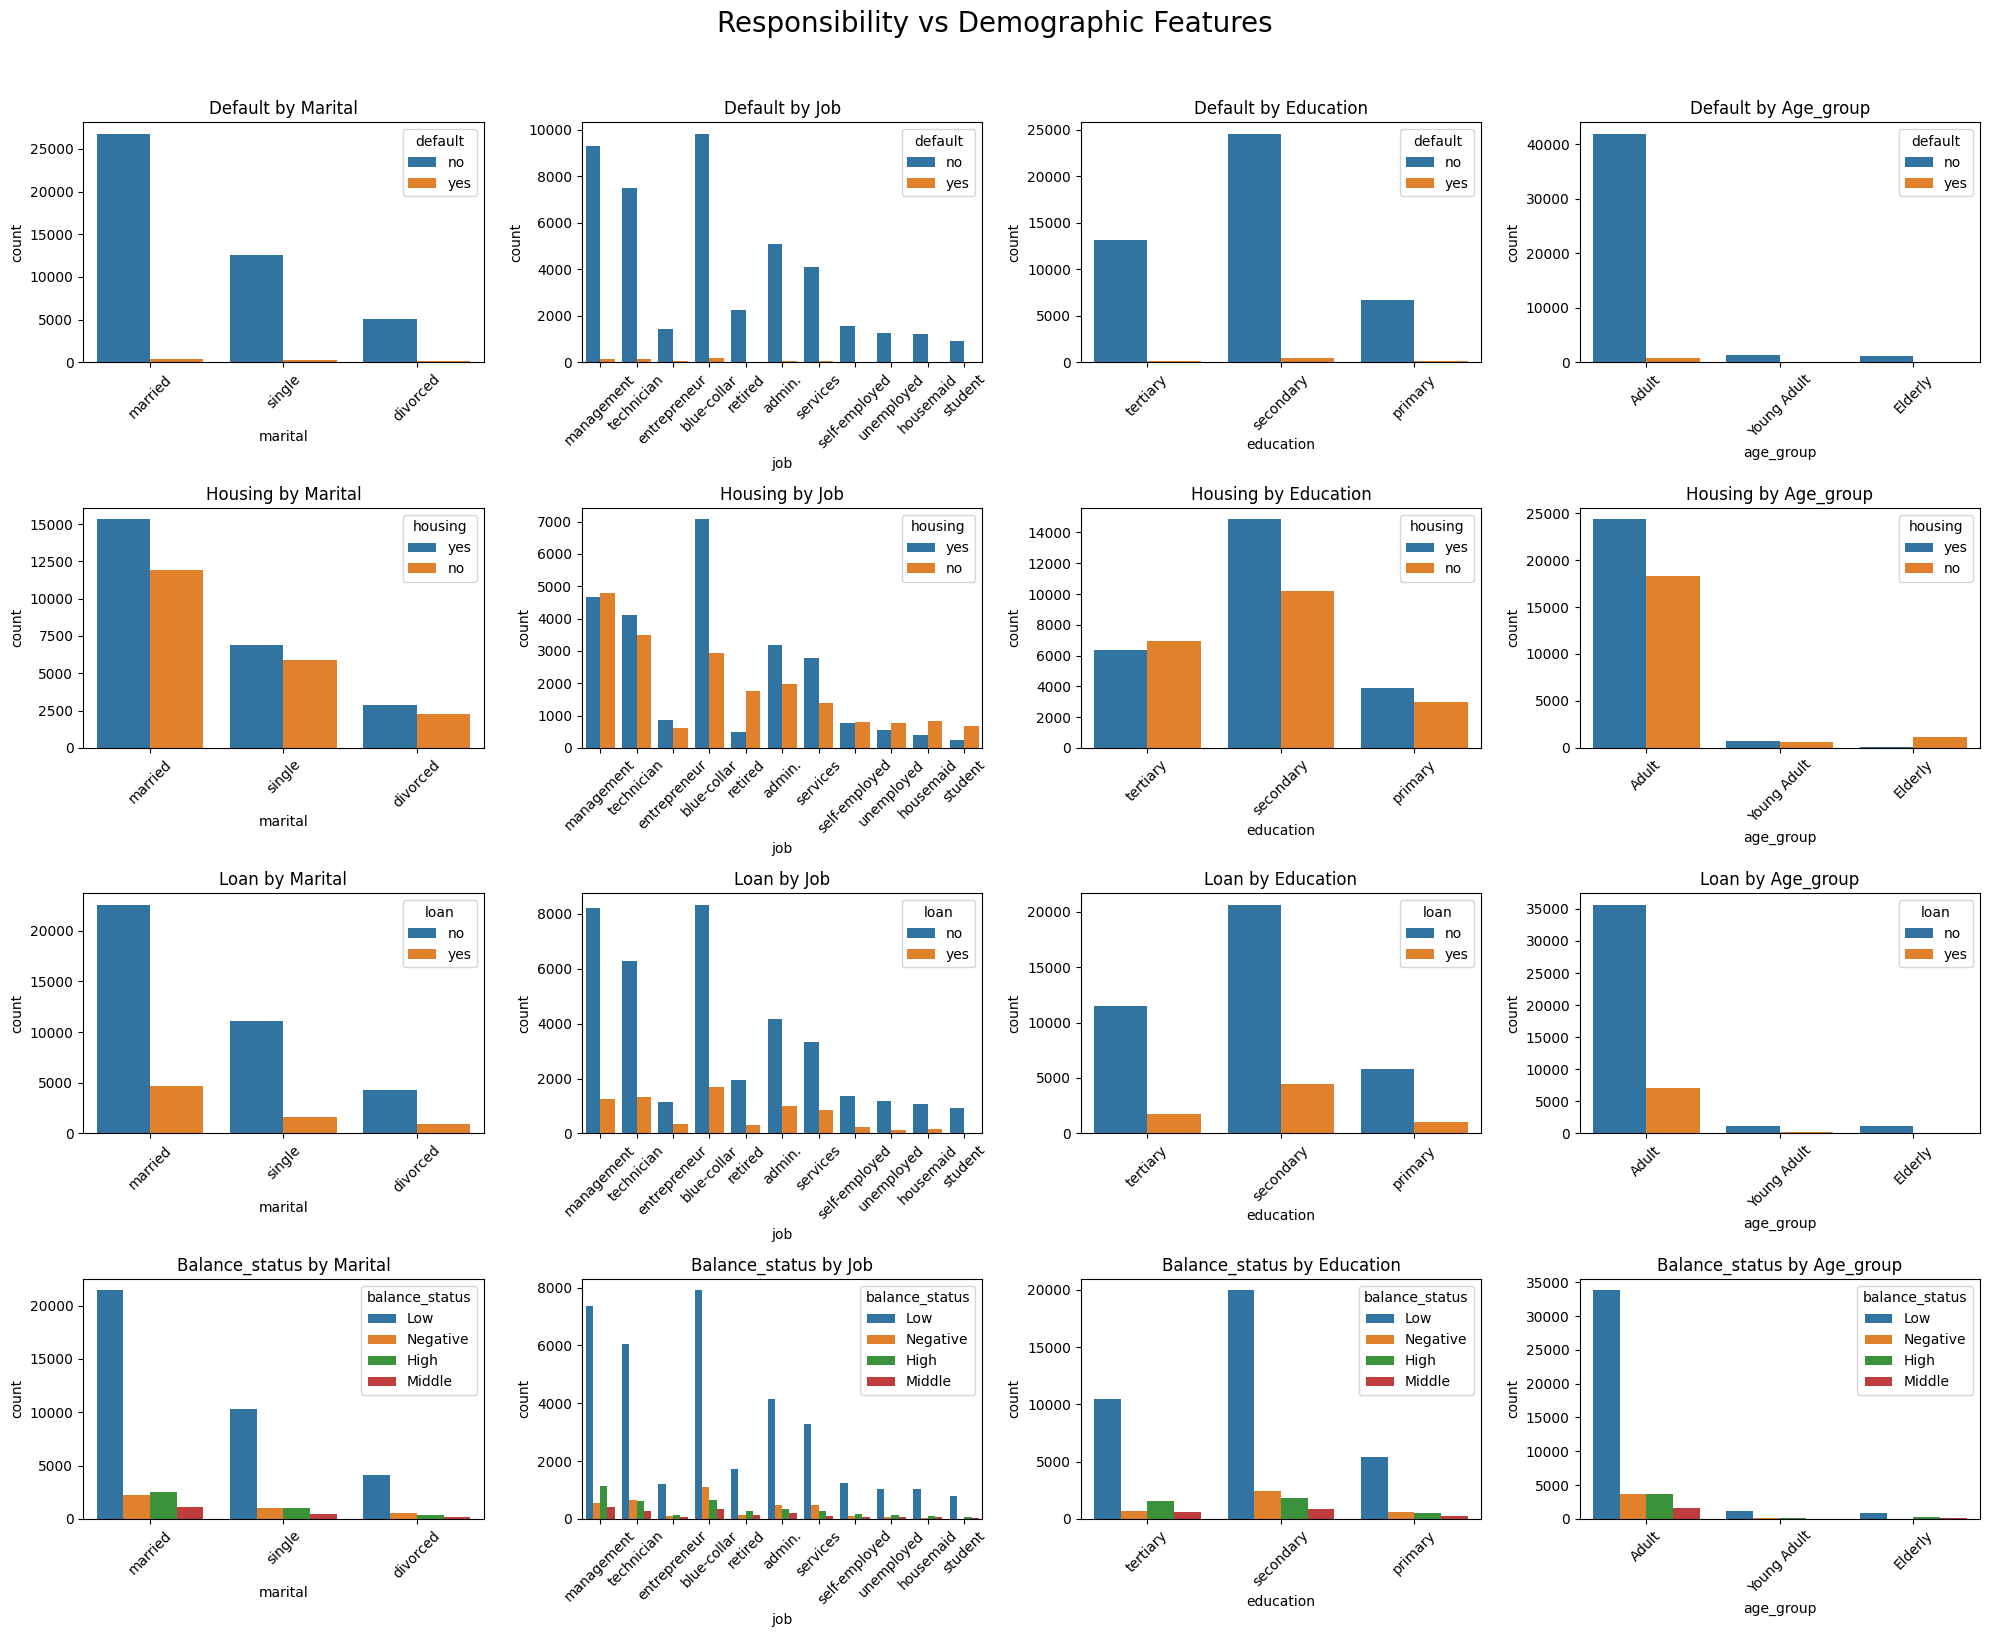

In [16]:
def responsibility_vs_demo(data, responsibility, demo_feature, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    sns.countplot(data=data, x=demo_feature, hue=responsibility, ax=ax)
    ax.set_title(f'{responsibility.capitalize()} by {demo_feature.capitalize()}')
    ax.tick_params(axis='x', rotation=45)


demo_features = ['marital', 'job', 'education', 'age_group']
responsibilities = ['default', 'housing', 'loan', 'balance_status']

fig, axes = plt.subplots(len(responsibilities), len(demo_features), figsize=(20, 16))
plt.subplots_adjust(hspace=0.5)

for i, resp in enumerate(responsibilities):
    for j, demo in enumerate(demo_features):
        ax = axes[i, j]
        responsibility_vs_demo(bank_data, resp, demo, ax=ax)
       
plt.suptitle('Responsibility vs Demographic Features', fontsize=20, y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

# Responsibility vs Demographic Features
This section uses count plots to explore the relationship between financial responsibilities (default, housing loan, personal loan, balance status) and demographic features (marital status, job, education, age group).

In [17]:
bank_data.to_csv('bank_m.csv', index=False)

# Conclusion
In this project, we explored the Bank Marketing dataset to understand the factors influencing investment adoption, specifically the subscription to term deposits. Through comprehensive data cleaning, feature engineering, and exploratory data analysis (EDA), we identified key demographic and campaign-related variables that impact client behavior.

Our visualizations revealed important patterns, such as the influence of balance status, age group, job type, and previous campaign outcomes on subscription rates. By transforming and analyzing both numeric and categorical features, we gained valuable insights into customer segments more likely to adopt investment products.

The next step involved building predictive models using these insights. By preparing the data and applying machine learning algorithms, we created a robust pipeline capable of predicting investment adoption with improved accuracy, check model.ipynb for it.

Overall, this behaviour-informed approach provides actionable intelligence for targeted marketing strategies, enabling financial institutions to better identify and engage potential clients for investment products. 